In [1]:
import seaborn as sns
import pandas as pd
from sklearn import __version__ as sklversion

In [2]:
rfr = pd.read_csv("rf_results.csv")

In [3]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ndims       54 non-null     int64  
 1   mode        54 non-null     object 
 2   dist_sigma  54 non-null     float64
 3   nsamples    54 non-null     int64  
 4   c2st_score  54 non-null     float64
 5   time_sec    54 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.7+ KB


In [4]:
nnr = pd.read_csv("nn_results.csv")

In [5]:
nnr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ndims       54 non-null     int64  
 1   mode        54 non-null     object 
 2   dist_sigma  54 non-null     float64
 3   nsamples    54 non-null     int64  
 4   c2st_score  54 non-null     float64
 5   time_sec    54 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.7+ KB


In [6]:
df = pd.concat([ rfr, nnr ], ignore_index=True)

In [7]:
df = df.astype({"mode":"category"})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ndims       108 non-null    int64   
 1   mode        108 non-null    category
 2   dist_sigma  108 non-null    float64 
 3   nsamples    108 non-null    int64   
 4   c2st_score  108 non-null    float64 
 5   time_sec    108 non-null    float64 
dtypes: category(1), float64(3), int64(2)
memory usage: 4.6 KB


In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
common_palette = sns.dark_palette("blue", n_colors=len(df.nsamples.unique()))

## test set accuracy versus distance of ensembles and data set size

First, we study the behaviour of the average test set accuracy returned by `c2st` versus the dataset size and the distance between two samples in units of standard deviations. In this dataset, two multivatiate normal distributions were samples with variance of 1 and dimensionality of 10 (see the `ndims` column of `df`). Each ensemble yields `nsamples` number of samples. 

For, `dist_sigma = 0.` both ensembles _P_ and _Q_ originate from the same multivariate PDF. For `dist_sigma = 1.25`, the mean values of _P_ are located at `mu_P = 0` and of _Q_ at `mu_Q = 1.25`. For `dist_sigma = 2.`, the mean values of _P_ are located at `mu_P = 0` and of _Q_ at `mu_Q = 2.`.

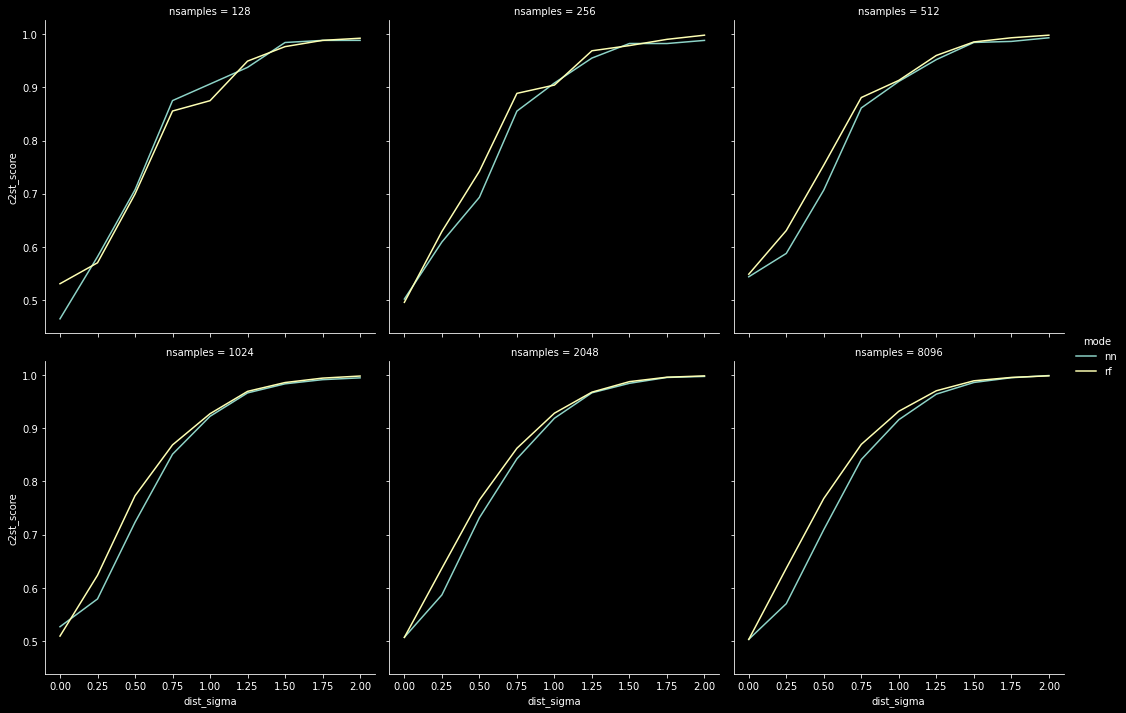

In [10]:
g = sns.relplot(data=df, x="dist_sigma", y="c2st_score", hue="mode", col="nsamples", kind="line", col_wrap=3)

From the plots above, we see that with increasing dataset size `nsamples` of _P_ and _Q_, the outputs of the both tests become more smooth. This confirms expectations, that classifyiers return more robust predictions with larger datasets. In all but the smallest `nsamples` case, the random forest `rf` based `c2st` invocation returns higher accuracy values. Without an uncertainty analysis of this, it hard to make a conclusive judgement on this observation.

We can also see, that with decreasing `nsamples` accuracy values start to become more divergent. As an exemplary point of interest, `dist_sigma = 0.` can serve as an hint to quantify the possibility false positive conclusions. Only in the small samples size of `128` samples of _P_ and _Q_ each, a considerable deviation from the expected value of 0.5 can be observed. In this scenario, again, an uncertainty estimate could help to make more concrete inferences from this observation.

In [11]:
g.savefig("c2stscore_vs_distance.png")

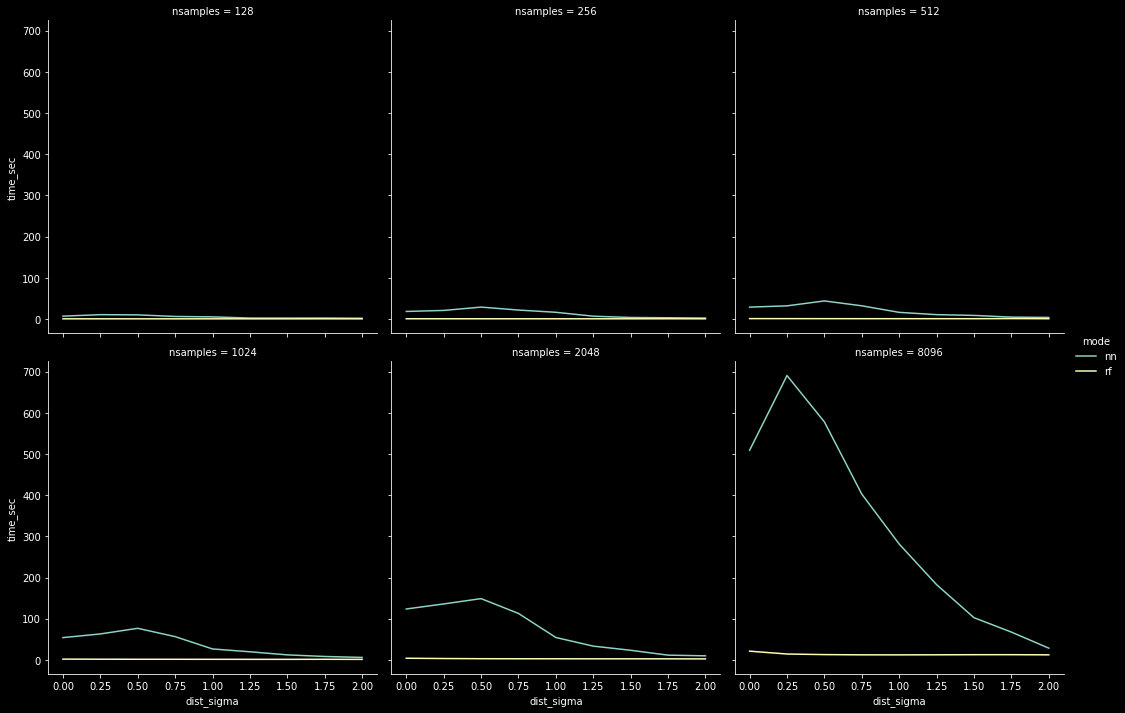

In [12]:
g = sns.relplot(data=df, x="dist_sigma", y="time_sec", hue="mode", col="nsamples", kind="line", col_wrap=3)

In [13]:
g.savefig("time_vs_distance.png")

There are several observations to make from the plots above in which the runtime of the `c2st` using a neural networt of 2 hidden layers with 10*ndim neurons was trained (`nn`) or a random forest (using `skleanr`s default parameters) was used.

- with increasing dataset size, the average runtime of `nn` is far higher than of the `rf` variant
- especially in the low `dst_sigma` regime, the `nn` exposes much higher training times (which is expected as the 2 ensembles become more and more undistinguishable)
- the maximum runtime ratio between `rf` and `nn` can be as high as 32x

In [14]:
nnr.time_sec.max()/rfr.time_sec.max()

32.585095904236425